# Trabajo Semanal 2

Desarrollo de algoritmo que calcula la Transformada Digital de Fourier

Definiciones de funciones a utilizar y librerías

In [1]:
# -*- coding: utf-8 -*-
"""

@author: Hugo Alejandro Gomez

Descripción:
------------
Generador de señales senoidales y Transformada Discreta de Fourier
Version 2
testbenchDFT_fft.py

"""

import numpy as np
import matplotlib.pyplot as plt

#%%  Inicialización

#%%  Testbench: creamos una función que no recibe argumentos para asegurar que siempre encontraremos nuestro espacio de variables limpio.

def funcionSeno (vmax, dc, ff, ph, nn, fs):
    
    # Grilla de sampleo temporal
    tt = np.arange(0.0, nn/fs, 1/fs)
    # Calculo de los valores punto a punto de la funcion
    xx = vmax * np.sin(tt*2*np.pi*ff + ph) + dc
    
    return tt,xx

#%%funcionDFTok
def funcionDFTok(xx):
    N=len(xx)
       
    n=np.arange(N)
    
    #casteo a complejo
    X=np.zeros(N)*(1j)
    
    for k in range (N):
            
        twiddle = np.exp(-2j*np.pi*k*n/N)      
        
        X[k] = np.dot(twiddle,xx)
        
    return X
    

Testbench de la DFT con una señal formada por la suma de tres senoidales

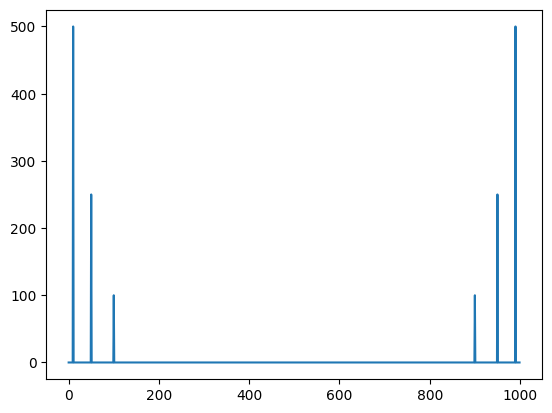

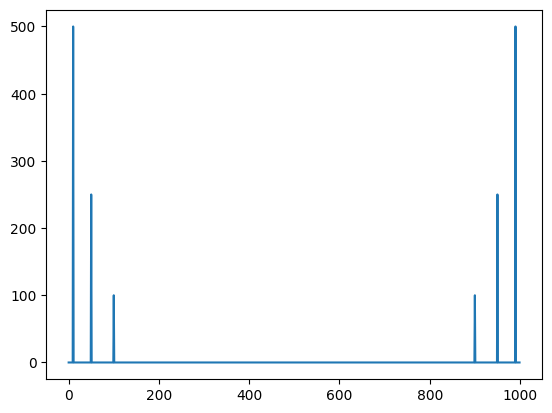

In [4]:
#%% Cálculos
# Inicialización de variables 
N=1000
fs=1000
ts=1/fs
df=fs/N

n=np.arange(N)
T=N/fs
#array de N elementos separadas por la resolución espectral
ff=n/T


# Invocamos a nuestro testbench exclusivamente: 
#tt,xx = funcionSeno( vmax=1, dc=0, ff=1, ph=0, nn=N, fs=fs)
tt,x1 = funcionSeno( vmax=1, dc=0, ff=10, ph=0, nn=N, fs=fs)
tt,x2 = funcionSeno( vmax=.5, dc=0, ff=50, ph=0, nn=N, fs=fs)
tt,x3 = funcionSeno( vmax=.2, dc=0, ff=100, ph=0, nn=N, fs=fs)

xx=x1+x2+x3

X = funcionDFTok(xx)

n=np.arange(N)
T=N/fs
#array de N elementos separadas por la resolución espectral
ff=n/T


xx_fft = np.fft.fft(xx)
plt.clf()
plt.figure(1)
plt.plot(abs(xx_fft))

plt.figure(2)
plt.plot(abs(X))

plt.show()





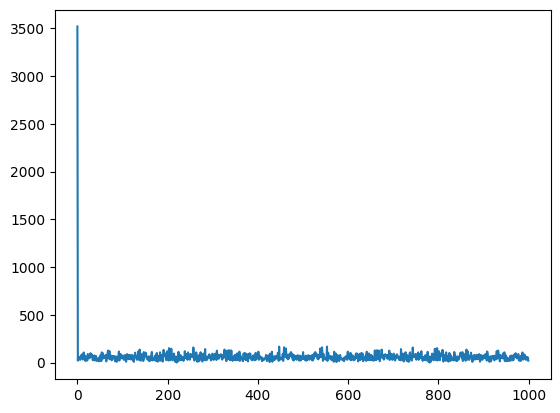

In [3]:
#Ruido uniforme de varianza 4
ruido = np.random.uniform(0,(np.sqrt(48)),1000)
Xruido = funcionDFTok(ruido)
plt.figure(3)
plt.plot(abs(Xruido))
plt.show()